# Analysing the demographics of users on StackOverflow

#### In this notebook we are going to take a look at three questions regarding the demographics of the users of stack overflow. The first question relates to the number of students and professional developers. The second question relates to the number of people who work part-time and full-time. Finally, the last question relates to the number of people with Master's degrees and Doctoral degrees

## Gather

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
survey = pd.read_csv("survey_results_public.csv")

## Data Understanding

In [3]:
survey.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
survey.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,51392.000000,42695.000000,40376.000000,20600.000000,36592.000000,12891.000000,2566.000000
mean,25696.500000,7.300574,6.957078,3.952282,8.429875,56298.480641,33142.220468
std,14835.736854,1.955444,2.167652,7.564722,1.390635,39880.905277,30162.988829
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12848.750000,6.000000,6.000000,1.000000,8.000000,26440.371839,4490.492484
50%,25696.500000,8.000000,7.000000,1.000000,9.000000,50000.000000,29364.263691
75%,38544.250000,9.000000,8.000000,4.000000,10.000000,80000.000000,50403.225806
max,51392.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000


## Data Preparation

In [33]:
survey.isnull().sum()

Respondent                         0
Professional                       0
ProgramHobby                       0
Country                            0
University                         0
EmploymentStatus                   0
FormalEducation                    0
MajorUndergrad                  8551
HomeRemote                      7384
CompanySize                    12470
CompanyType                    12569
YearsProgram                     247
YearsCodedJob                  10502
YearsCodedJobPast              50418
DeveloperType                  15267
WebDeveloperType               40696
MobileDeveloperType            49839
NonDeveloperType               46502
CareerSatisfaction              8697
JobSatisfaction                11016
ExCoderReturn                  50469
ExCoderNotForMe                50471
ExCoderBalance                 50469
ExCoder10Years                 50475
ExCoderBelonged                50464
ExCoderSkills                  50457
ExCoderWillNotCode             50470
E

## Assess and Visualize

C:\Users\Sirel\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


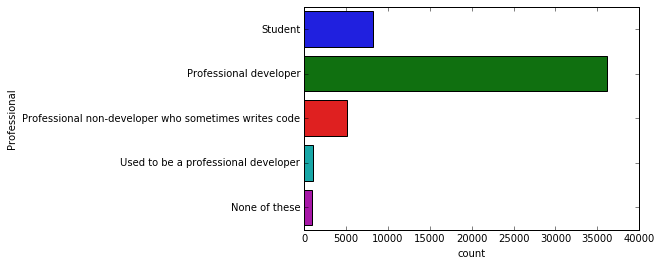

In [16]:
# what is the distribution of students and professional developers amongst the users of stackoverflow
#Let's start off by making a barplot
sns.countplot(y='Professional',data =survey,orient='v')
plt.show()

In [24]:
my_tab = pd.crosstab(index=survey["Professional"],  # Make a crosstab
                              columns="count",normalize=False,margins=True) 
print(my_tab)
my_tab = pd.crosstab(index=survey["Professional"],  # Make a crosstab
                              columns="count",normalize=True) 
my_tab

col_0                                               count    All
Professional                                                    
None of these                                         914    914
Professional developer                              36131  36131
Professional non-developer who sometimes writes...   5140   5140
Student                                              8224   8224
Used to be a professional developer                   983    983
All                                                 51392  51392


col_0,count
Professional,
None of these,0.017785
Professional developer,0.703047
Professional non-developer who sometimes writes code,0.100016
Student,0.160025
Used to be a professional developer,0.019127


It seems evident, then that the higest percentage of users on StackOverflow are professional developers. This can probably make you sleep tight at night, knowing that your questions are most probably being answered by a professional. This does not tell you, however, how active they are at answering the questions. Maybe they are the ones posing them.

C:\Users\Sirel\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


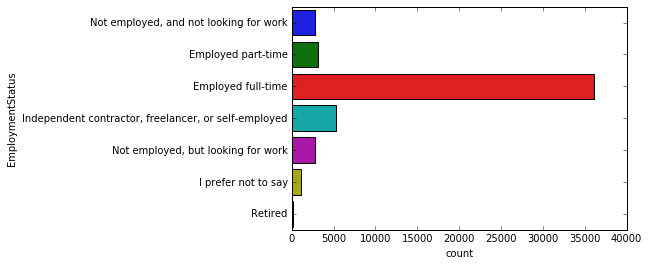

In [25]:
## How many people using stackoverflow work
sns.countplot(y='EmploymentStatus',data =survey,orient='v')
plt.show()

In [26]:
my_tab = pd.crosstab(index=survey["EmploymentStatus"],  # Make a crosstab
                              columns="count",normalize=False,margins=True) 
print(my_tab)
my_tab = pd.crosstab(index=survey["EmploymentStatus"],  # Make a crosstab
                              columns="count",normalize=True) 
my_tab

col_0                                               count    All
EmploymentStatus                                                
Employed full-time                                  36148  36148
Employed part-time                                   3180   3180
I prefer not to say                                  1086   1086
Independent contractor, freelancer, or self-emp...   5233   5233
Not employed, and not looking for work               2791   2791
Not employed, but looking for work                   2786   2786
Retired                                               168    168
All                                                 51392  51392


col_0,count
EmploymentStatus,
Employed full-time,0.703378
Employed part-time,0.061877
I prefer not to say,0.021132
"Independent contractor, freelancer, or self-employed",0.101825
"Not employed, and not looking for work",0.054308
"Not employed, but looking for work",0.054211
Retired,0.003269


This indicates that around 76% are employed amongst the users of stackoverflow. One could also include the 10% that are working as freelancers, which would make it 86%. However, in this case the question is meant to probe those who are actually working as a part of an organisation, and so are probably held to high standards professionally.

C:\Users\Sirel\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


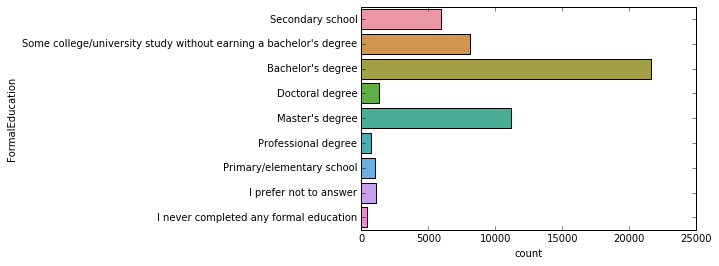

In [27]:
## How many people using stackoverflow work
sns.countplot(y='FormalEducation',data =survey,orient='v')
plt.show()

In [28]:
my_tab = pd.crosstab(index=survey["FormalEducation"],  # Make a crosstab
                              columns="count",normalize=False,margins=True) 
print(my_tab)
my_tab = pd.crosstab(index=survey["FormalEducation"],  # Make a crosstab
                              columns="count",normalize=True) 
my_tab

col_0                                               count    All
FormalEducation                                                 
Bachelor's degree                                   21609  21609
Doctoral degree                                      1308   1308
I never completed any formal education                426    426
I prefer not to answer                               1109   1109
Master's degree                                     11141  11141
Primary/elementary school                            1047   1047
Professional degree                                   715    715
Secondary school                                     5908   5908
Some college/university study without earning a...   8129   8129
All                                                 51392  51392


col_0,count
FormalEducation,
Bachelor's degree,0.420474
Doctoral degree,0.025451
I never completed any formal education,0.008289
I prefer not to answer,0.021579
Master's degree,0.216785
Primary/elementary school,0.020373
Professional degree,0.013913
Secondary school,0.114960
Some college/university study without earning a bachelor's degree,0.158176


C:\Users\Sirel\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


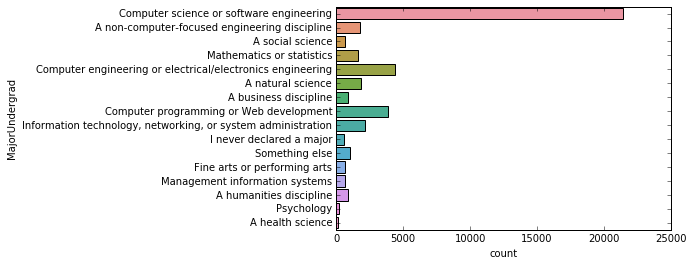

In [35]:
sns.countplot(y='MajorUndergrad',data =survey,orient='v')
plt.show()

In [38]:
my_tab = pd.crosstab(index=survey["MajorUndergrad"],  # Make a crosstab
                              columns="count",normalize=True) 
my_tab

col_0,count
MajorUndergrad,
A business discipline,0.021008
A health science,0.003315
A humanities discipline,0.021031
A natural science,0.043533
A non-computer-focused engineering discipline,0.041759
A social science,0.014776
Computer engineering or electrical/electronics engineering,0.101865
Computer programming or Web development,0.090637
Computer science or software engineering,0.499732


So the highest percentage of stackoverflow users hold bachelor degrees as their highest education. The question is trying to investigate how many of the stackoverflow users have formal education up to a reasonable level. So it would be correct to include people with a Master's degree, Doctoral degree, and professional degree. So in reality 67.5% of stackoverflow users have a higher education

## Conclusion

It definitely seems that a lot of stackoverflow users are qualified to answer technical questions since there is a high rate of professional developers, and people with a computer science related degree, that are working full time or part time in an organization.